# Travail personnel d'analyse numérique : le pendule double

Marine VILARIÑO FOSTIER

Rossen DIMITROV

### Introduction générale

Nous nous intéressons dans ce travail au problème du pendule double. La première étape sera d'implémenter les équations du mouvement. Celles-ci sont déterminées par le Lagrangien du pendule double:

$$L=\frac{1}{6}ml^{2}(\dot{\theta}_{2}^{2}+4\dot{\theta}_{2}^{2}+3\dot{\theta}_{1}\dot{\theta}_{2}\cos{(\theta_{1}-\theta_{2}})) + \frac{1}{2}mgl(3\cos{\theta_{1}} + \cos{\theta_{2}})$$

Pour obtenir les équations du mouvement, nous appliquons l'équation de Lagrange:

$$\frac{d}{dt} \left ( \frac{\partial L}{\partial \dot{q}_{j}} \right ) = \frac{\partial L}{\partial q_{j}}$$

En développant cette expression pour $\theta_{1}, \dot{\theta}_{1}$ et pour $\theta_{2}, \dot{\theta}_{2}$, nous obtenons deux équations:

$$8\ddot{\theta}_{1} + 3\ddot{\theta}_{2} \cos{(\theta_{1}-\theta_{2})} + 3\dot{\theta}_{2}^{2} \sin{(\theta_{1}-\theta_{2})} = -9 \frac{g}{l} \sin{\theta_{1}}$$

$$2\ddot{\theta}_{2} + 3\ddot{\theta}_{1} \cos{(\theta_{1}-\theta_{2})} - 3\dot{\theta}_{1}^{2} \sin{(\theta_{1}-\theta_{2})} = -3 \frac{g}{l} \sin{\theta_{2}}$$

Nous pouvons alors isoler les expressions de $\ddot{\theta}_{1}$ et $\ddot{\theta}_{2}$ pour obtenir les équations du mouvement que nous alons pouvoir utiliser:

$$\ddot{\theta}_{1} = \frac{-6 \dot{\theta}_{2}^{2} \sin{(\theta_{1}-\theta_{2})} - 9 \dot{\theta}_{1}^{2} \sin{(\theta_{1}-\theta_{2})} \cos{(\theta_{1}-\theta_{2})} + 9 \frac{g}{l} \sin{\theta_{2}} \cos{(\theta_{1}-\theta_{2})} - 18 \frac{g}{l} \sin{\theta_{1}}}{16 - 9 \cos{(\theta_{1}-\theta_{2})}^{2}}$$

$$\ddot{\theta}_{2} = \frac{24 \dot{\theta}_{1}^{2} \sin{(\theta_{1}-\theta_{2})} + 9 \dot{\theta}_{2}^{2} \sin{(\theta_{1}-\theta_{2})} \cos{(\theta_{1}-\theta_{2})} - 24 \frac{g}{l} \sin{\theta_{2}} + 27 \frac{g}{l} \sin{\theta_{1}} \cos{(\theta_{1}-\theta_{2})}}{16 - 9 \cos{(\theta_{1}-\theta_{2})}^{2}}$$

Ces équations ne peuvent pas être intégrées analytiquement. Cependant, nous pouvons le faire numériquement. Pour cela, nous allons utiliser la méthode Runge-Kutta d'ordre 4, afin d'obtenir les valeurs de $\theta_{1}, \theta_{2}$ en fonction du temps.

Pour cela, nous effectuons d'abord un changement de variables, afin de nous ramener à des équations différentielles du premier ordre. 

Posons $\begin{cases} \omega_{1} = \dot{\theta}_{1} \\ \omega_{2} = \dot{\theta}_{2} \end{cases}$

Nous obtenons ainsi un système d'équations du premier ordre:

$$\begin{cases} \dot{\theta}_{1} = \omega_{1} \\
\dot{\omega}_{1} = \frac{-6 \omega_{2}^{2} \sin{(\theta_{1}-\theta_{2})} - 9 \omega_{1}^{2} \sin{(\theta_{1}-\theta_{2})} \cos{(\theta_{1}-\theta_{2})} + 9 \frac{g}{l} \sin{\theta_{2}} \cos{(\theta_{1}-\theta_{2})} - 18 \frac{g}{l} \sin{\theta_{1}}}{16 - 9 \cos{(\theta_{1}-\theta_{2})}^{2}} \\
\dot{\theta}_{2} = \omega_{2}\\
\dot{\omega}_{2} = \frac{24 \omega_{1}^{2} \sin{(\theta_{1}-\theta_{2})} + 9 \omega_{2}^{2} \sin{(\theta_{1}-\theta_{2})} \cos{(\theta_{1}-\theta_{2})} - 24 \frac{g}{l} \sin{\theta_{2}} + 27 \frac{g}{l} \sin{\theta_{1}} \cos{(\theta_{1}-\theta_{2})}}{16 - 9 \cos{(\theta_{1}-\theta_{2})}^{2}} \end{cases}$$

Appliquons la méthode Runge-Kutta d'ordre 4 à ce système.


### Methode Runge-Kutta d'ordre 4

La méthode permet de résoudre des problèmes aux conditions initiales de la forme $\dot{y} = f(t, y), y(t_{0}) = y_{0}$

En choisissant un intervale de temps $dt$, la solution de l'équation différentielle est donnée par un ensemble de valeurs $y_{n}$ défini par:

$$ \begin{cases} y_{n+1} = y_{n} + \frac{1}{6}(k_{0} + 2k_{1} + 2k_{2} + k_{3})
\\ t_{n+1} = t_{n} + dt \end{cases} $$

Où

$$ \begin{cases} k_{0} = dt.f(t_{n}, y_{n})
\\ k_{1} = dt.f(t_{n} + \frac{h}{2}, y_{n} + \frac{k0}{2})
\\ k_{2} = dt.f(t_{n} + \frac{h}{2}, y_{n} + \frac{k1}{2})
\\ k_{3} = dt.f(t_{n} + h, y_{n} + k_{2}) \end{cases}$$ 

Les équations du mouvement que nous utilisons n'ont pas de dépendance temporelle explicite. Elles sont exprimées sous la forme:

$$ \begin{cases} \dot{\omega}_{1} = f(\omega_{1}, \omega_{2}, \theta_{1}, \theta{2})
\\ \dot{\omega}_{2} = g(\omega_{1}, \omega_{2}, \theta_{1}, \theta{2})
\\ \dot{\theta}_{1} = h(\omega_{1}, \omega_{2}, \theta_{1}, \theta{2})
\\ \dot{\theta}_{2} = i(\omega_{1}, \omega_{2}, \theta_{1}, \theta{2}) \end{cases}$$

Pour les résoudre, nous appliquons donc quatre fois la méthode. La solution pour $\omega_{1}$ est par exemple:

$$ \omega_{1, n+1} = \omega_{1, n} + \frac{1}{6} (k_{0} + 2k_{1} + 2k_{2} + k_{3}) $$

où

$$\begin{cases} k_{0} = dt.f(\omega_{1, n}, \omega_{2, n}, \theta_{1, n}, \theta_{2, n})
\\ k_{1} = dt.f(\omega_{1, n} + \frac{k_{0}}{2}, \omega_{2, n} + \frac{j_{0}}{2}, \theta_{1, n} + \frac{l_{0}}{2}, \theta_{2, n} + \frac{m_{0}}{2})
\\ k_{2} = dt.f(\omega_{1, n} + \frac{k_{1}}{2}, \omega_{2, n} + \frac{j_{1}}{2}, \theta_{1, n} + \frac{l_{1}}{2}, \theta_{2, n} + \frac{m_{1}}{2})
\\ k_{3} = dt.f(\omega_{1, n}+k_{2}, \omega_{2, n}+j_{2}, \theta_{1, n}+l_{2}, \theta_{2, n}+m_{2}) \end{cases}$$ 

et où les $j_{i}, l_{i}, m_{i}$ sont définis de façon similaire par rapport à $g, h, i$ respectivement.

### Question 1

In [85]:
import math
import numpy
from matplotlib import pyplot
%matplotlib inline

In [86]:
# Set the parameters
m = 1.0
L = 1.0
g = 9.81
dt = 0.001
tmax = 20.0
# Set initial condition
th1_init = numpy.pi/2
th2_init = numpy.pi/2
thdot1_init = 0.0
thdot2_init = 0.0

Commençons par écrire un pas de la méthode Runge-Kutta d'ordre 4 définie ci-dessus pour des fonctions générales $f, g, h, i$ :

In [87]:
def rk4_step(udot, vdot, u, v, dt, f, g, h, i, *args):
    """
    Returns the solution at the next time step using RK4 method
    
    Parameters:
    ------
    udot : float
        Solution for the first derivative of first variable at previous time step
    vdot : float
        Solution for the first derivative of second variable at previous time step
    u : float
        value of first variable at previous time step
    v : float
        value of second variable at previous time step
    dt : float
        time-step size
    f : function
        function to compute the derivatives of first variable
    g : function
        function to compute the derivatives of second variable
    h : function
        function to compute the derivatives of third variable
    i : function
        function to compute the derivatives of fourth variable
    args : tuple, optionnal
        positional arguments to pass to the functions f and g
        
    Returns:
    ------
    step : numpy.ndarray
        the solution at next time-step
        as a 1D array of floats
    """
    k0 = f(udot, vdot, u, v, *args) * dt
    j0 = g(udot, vdot, u, v, *args) * dt
    l0 = h(udot, vdot, u, v, *args) * dt
    m0 = i(udot, vdot, u, v, *args) * dt
    k1 = f(udot + k0/2, vdot + j0/2, u + l0/2, v + m0/2, *args) * dt 
    j1 = g(udot + k0/2, vdot + j0/2, u + l0/2, v + m0/2, *args) * dt
    l1 = h(udot + k0/2, vdot + j0/2, u + l0/2, v + m0/2, *args) * dt 
    m1 = i(udot + k0/2, vdot + j0/2, u + l0/2, v + m0/2, *args) * dt 
    k2 = f(udot + k1/2, vdot + j1/2, u + l1/2, v + m1/2, *args) * dt
    j2 = g(udot + k1/2, vdot + j1/2, u + l1/2, v + m1/2, *args) * dt
    l2 = h(udot + k1/2, vdot + j1/2, u + l1/2, v + m1/2, *args) * dt
    m2 = i(udot + k1/2, vdot + j1/2, u + l1/2, v + m1/2, *args) * dt
    k3 = f(udot + k2, vdot + j2, u + l2, v + m2, *args) * dt
    j3 = g(udot + k2, vdot + j2, u + l2, v + m2, *args) * dt
    l3 = h(udot + k2, vdot + j2, u + l2, v + m2, *args) * dt
    m3 = i(udot + k2, vdot + j2, u + l2, v + m2, *args) * dt
    
    udot_new = udot + (k0 + 2*k1 + 2*k2 + k3)/6
    vdot_new = vdot + (j0 + 2*j1 + 2*j2 + j3)/6
    u_new = u + (l0 + 2*l1 + 2*l2 + l3)/6
    v_new = v + (m0 + 2*m1 + 2*m2 + m3)/6
    
    step = numpy.array([udot_new, vdot_new, u_new, v_new])
    
    return step

Ecrivons les fonctions définissant le membre de droite de l'équation différentielle pour $\omega_{1}$ et $\omega_{2}$ :

In [88]:
def omegadot1(omega1, omega2, th1, th2, g = 9.81, L = 1.0):
    """
    Returns the value of the second derivative for theta1 at given time
    
    Parameters
    ------
    omega1 : float
            value of the derivative for first angle at given time
    omega2 : float
            value of the derivative for second angle at given time
    th1 : float
            value of first angle at given time
    th2 : float
            value of second angle at given time
    g : float, optionnal
            gravitational acceleration
            default value : 9.81
    L : float, optionnal
            lenght of each rod
            default value : 1.0
       
    Returns
    -------
    thdotdot1 : float
        value of the second derivative for first angle at given time

    
    """
    thdotdot1 = ((-9 * omega1**2 * math.sin(th1-th2) * math.cos(th1-th2) -
                  6 * omega2**2 * math.sin(th1-th2) +
                  9 * g/L * math.sin(th2) * math.cos(th1-th2) -
                  18*(g/L) * math.sin(th1)) / 
                 (16 - 9 * (math.cos(th1-th2))**2))
    
    return thdotdot1

def omegadot2(omega1, omega2, th1, th2, g = 9.81, L = 1.0):
    
    """
    Returns the value of the second derivative for theta2 at given time
    
    Parameters
    ------
    omega1 : float
            value of the derivative for first angle at given time
    omega2 : float
            value of the derivative for second angle at given time
    th1 : float
            value of first angle at given time
    th2 : float
            value of second angle at given time
    g : float, optionnal
            gravitational acceleration
            default value : 9.81
    L : float, optionnal
            lenght of each rod
            default value : 1.0
    
    Returns
    -------
    thdotdot2 : float
        value of the second derivative for second angle at given time
    """
        
    thdotdot2 = ((24 * omega1**2 * math.sin(th1-th2) +
                  9* omega2**2 * math.sin(th1-th2) * math.cos(th1-th2) -
                  24*g/L* math.sin(th2) + 
                  27*g/L * math.sin(th1) * math.cos(th1-th2)) /
                 (16 - 9 * (math.cos(th1-th2))**2))
        
    return thdotdot2

Ainsi que pour $\theta_{1}$ et $\theta_{2}$ : 

In [89]:
def thetadot1(omega1, omega2, th1, th2):
    thetadot1 = omega1
    return thetadot1

def thetadot2(omega1, omega2, th1, th2):
    thetadot2 = omega2
    return thetadot2

Nous pouvons maintenant résoudre les équations du mouvement, et obtenir les coordonnées des deux extrémités au temps souhaité.

In [93]:
N = int(tmax/dt) + 1 # number of time steps
# Set initial conditions
res = numpy.empty((N, 4))
res[0] = numpy.array([thdot1_init, thdot2_init, th1_init, th2_init])
t = 0.0
# Time integration using RK4 method
for n in range(N-1):
    res[n+1] = rk4_step(res[n][0], res[n][1], res[n][2], res[n][3], dt, omegadot1, omegadot2, thetadot1, thetadot2)
    t = t + dt

In [94]:
th1 = res[:, 2]%(2*numpy.pi) # array of values for theta1
th2 = res[:, 3]%(2*numpy.pi) # array of values for theta2

# Coordinates of the end of first and second rod
# at each time step

x1 = numpy.empty(N)
y1 = numpy.empty(N)
x2 = numpy.empty(N)
y2 = numpy.empty(N)

for i in range(N):
    x1[i] = L * math.sin(th1[i])
    y1[i] = - L * math.cos(th1[i])
    x2[i] = L * math.sin(th1[i]) + L * math.sin(th2[i])
    y2[i] = - L * math.cos(th1[i]) - L * math.cos(th2[i])

    
# Coordinates of the end of first and second rod
# at t = tmax
print("Valeurs à t = {:.0f} secondes:".format(t))
print("Coordonées de l'extrémité de la première barre: ({:.3f}".format(x1[-1]),",{:.3f})".format(y1[-1]))
print("Coordonées de l'extrémité de la seconde barre: ({:.3f}".format(x2[-1]),",{:.3f})".format(y2[-1]))

Valeurs à t = 20 secondes:
Coordonées de l'extrémité de la première barre: (0.662 ,-0.750)
Coordonées de l'extrémité de la seconde barre: (0.071 ,0.057)


### Question 2

On définit la norme L1 de la différence entre une grille large et une grille fine, exactement de la même façon que dans les modules du cours:

In [95]:
def l1_diff(u_coarse, u_fine, dt):
    """
    Returns the difference in the L1-norm between the solution on
    a coarse grid and the solution on a fine grid.
    
    Parameters
    ----------
    u_coarse : numpy.ndarray
        Solution on the coarse grid as a 1D array of floats.
    u_fine : numpy.ndarray
        Solution on the fine grid as a 1D array of floats.
    dt : float
        Time-step size.
    
    Returns
    -------
    diff : float
        The difference between the two solution in the L1-norm
        scaled by the time-step size.
    """
    N_coarse = len(u_coarse)
    N_fine = len(u_fine)
    ratio = math.ceil(N_fine / N_coarse)
    diff = dt * numpy.sum(numpy.abs(u_coarse - u_fine[::ratio]))
    return diff

Nous résolvons ensuite à nouveau les équations du mouvements, avec des valeurs différentes de l'intervalle de temps. Le facteur de rafinement est ici $r = 2$. 
Nous créons une liste rassemblant les solutions aux équations du mouvement pour les différentes valeurs de dt, puis nous calculons les différences entre ces différentes solutions. Nous pouvons alors obtenir une représentation graphique de la différence en fonction de l'intervalle. Le graphe est logarithmique, afin de pouvoir observer un comportement linéaire.

In [96]:
r = 2  # time-step size refinement ratio
dt_min = 0.0001  # finest time-step size

dt_values = [dt_min, r * dt_min, r**2 * dt_min, r**4 * dt_min]
res_values = []

for i in range(len(dt_values)):
    N = int(tmax / (dt_values[i])) + 1  # number of time steps
    # Set initial conditions.
    resi = numpy.empty((N,4))
    resi[0] = numpy.array([thdot1_init, thdot2_init, th1_init, th2_init])
    # Time integration using RK4 method.
    for n in range(N - 1):
        resi[n + 1, :] = rk4_step(resi[n, 0], resi[n, 1], resi[n, 2], resi[n, 3], dt_values[i], 
                                 omegadot1, omegadot2, thetadot1, thetadot2)
    res_values.append(resi)


In [97]:
diff_values = []
for i, dt in enumerate(dt_values[:-1]):
    diff = l1_diff(res_values[-1][:, 2], res_values[i][:, 2], dt)
    diff_values.append(diff)

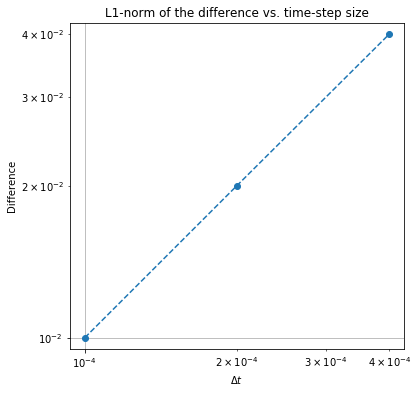

In [98]:
# Plot difference versus the time-step size.
pyplot.figure(figsize=(6.0, 6.0))
pyplot.title('L1-norm of the difference vs. time-step size')
pyplot.xlabel('$\Delta t$')
pyplot.ylabel('Difference')
pyplot.grid()
pyplot.loglog(dt_values[:-1], diff_values, color='C0', linestyle='--', marker='o')
pyplot.axis('equal');

Nous pouvons alors calculer l'ordre de convergence, en utilisant les solutions pour trois valeurs de l'intervalle de temps. L'ordre de convergence $p$ est en effet donné par:
$$p = \frac{\log{ \left( \frac{f_{3}-f_{2}}{f_{2}-f_{1}}\right)}}{\log{(r)}}$$
où $f_{3}$ est la solution de pas le plus fin, $f_{1}$ la solution de pas le plus large.

In [99]:
# Compute the observed order of convergence.
p = numpy.abs((math.log(l1_diff(res_values[2][:, 3], res_values[1][:, 3], dt_values[2]) /
              l1_diff(res_values[1][:, 3], res_values[0][:, 3], dt_values[1])) /
     math.log(r)))

print('Observed order of convergence: p = {:.3f}'.format(p))

Observed order of convergence: p = 3.832


Nous obtenons un ordre de convergence assez proche de 4. C'est bien évidemment cohérent avec ce que l'on peut attendre d'une méthode nommée "Runge-Kutta d'ordre 4"!

### Question 3

Créons à présent l'animation du pendule.

In [100]:
from matplotlib import animation
from IPython.display import HTML

In [101]:
dt = 0.001 # time-step size
tmax = 20.0 # lenght of time interval
N = int(tmax/dt) + 1 # number of time steps

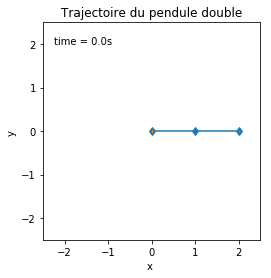

In [102]:
#définition et paramétrisation de la 'figure base': reste fixe durant toute l'animation. 
fig = pyplot.figure()
ax = fig.add_subplot(111, autoscale_on=False,
            xlim=(-2.5, 2.5), ylim=(-2.5, 2.5))

ax.set_title("Trajectoire du pendule double")
ax.set_xlabel("x ")
ax.set_ylabel("y ")
ax.set_aspect('equal')

line1, = ax.plot((0, x1[0],x2[0]), (0,y1[0],y2[0]), 'd-')
line2, = ax.plot((),(),'o',markersize=0.5)

time_template = 'time = %.1fs' #indicateur de temps réel.
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)


ux=numpy.zeros(N//10)
uy=numpy.zeros(N//10)


def animate(i): #La fonction 'animate' renvoit l'évolution du pendule double à chaque itération de i.
    #Valeurs des positions des extrémités des deux barreaux au temps: t=i*(0.001ms)*10
    vx=(0, x1[i*10],x2[i*10])
    vy=(0, y1[i*10],y2[i*10])
    #Consérvation des (x2,y2) déjà affichés.
    ux[i]=x2[i*10]
    uy[i]=y2[i*10]
    #Effacement des (x2,y2) apparus depuis 2 secondes.
    if i>200:
        ux[i-201]=0
        uy[i-201]=0
    line2.set_data(ux,uy)  
    line1.set_data(vx,vy) 
    
    time_text.set_text(time_template % (i*dt*10))
    return line1, line2, time_text

#Création de l'animation
anim = animation.FuncAnimation(fig, animate,frames=2000, interval=10) 
#frames: nombre de fois où la fonction 'animate' est évaluée 
#interval: temps entre chaque itération (en millisecondes)
#Dans notre animation, une seconde correspond a 100 itérations

pyplot.show()

In [103]:
#Lancement de l'animation avec la méthode d'affichage HTML 
#et la méthode to_html5_video de l'objet d'animation pour le rendre compatible avec le Web.
HTML(anim.to_html5_video())